In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df = df.iloc[:, 2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train test split

In [6]:
from sklearn.model_selection import train_test_split

#test_size is used to specify the proportion of the dataset to include in the test split. It can be a float (between 0.0 and 1.0) representing the percentage of the dataset, or an integer representing the absolute number of test samples. The default value is 0.25 (25% of the dataset).
#random_state is used to control the randomness of the train-test split. It ensures that the same split is generated each time the code is run, which can be useful for reproducibility. If random_state is set to an integer value, it will be used as the seed for the random number generator. If random_state is set to None (the default), the random number generator will use the current system time as the seed, resulting in a different split each time the code is run.
#axis 1 is used to drop the column "Purchased" from the dataframe and use it as the target variable (y) for the train-test split. The remaining columns will be used as features (X) for the train-test split.
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size=0.3, random_state=0)

In [7]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

standardization

In [8]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#fit the scalar to the train set, it will learn the parameters

scalar.fit(X_train)

#transform the train and test set
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [9]:
scalar.mean_ , scalar.var_ , scalar.scale_

(array([3.78642857e+01, 6.98071429e+04]),
 array([1.04038724e+02, 1.19572709e+09]),
 array([1.01999375e+01, 3.45792870e+04]))

In [10]:
#scaleed data is in the form of numpy array, we can convert it to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


*Effect of scaling*

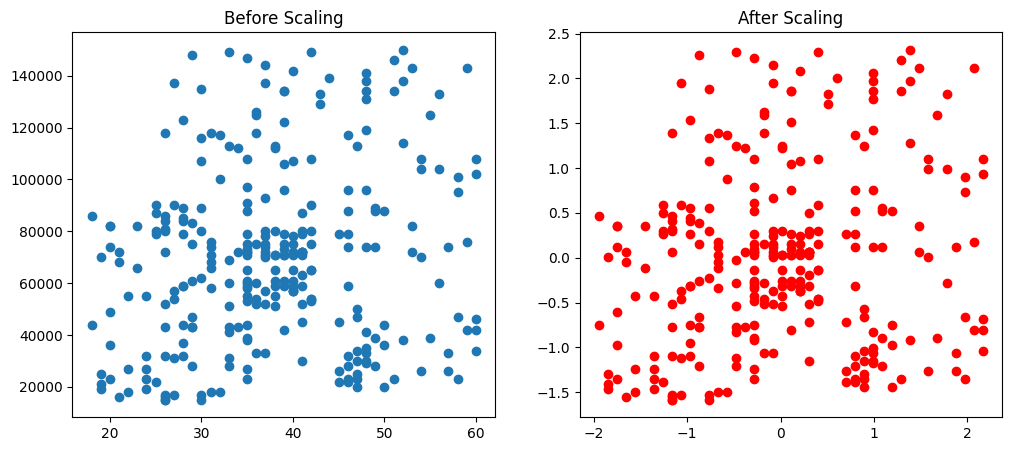

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color='red')
ax2.set_title("After Scaling")

plt.show()

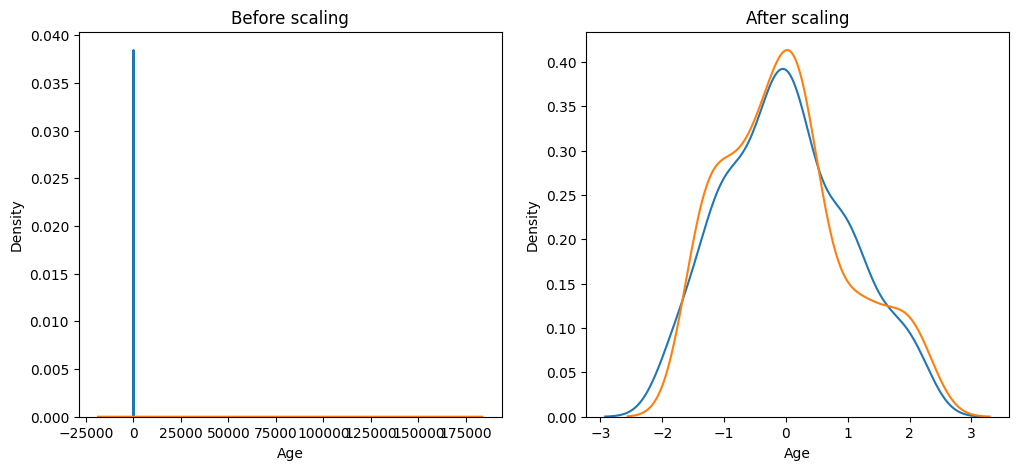

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

Comparison distribution

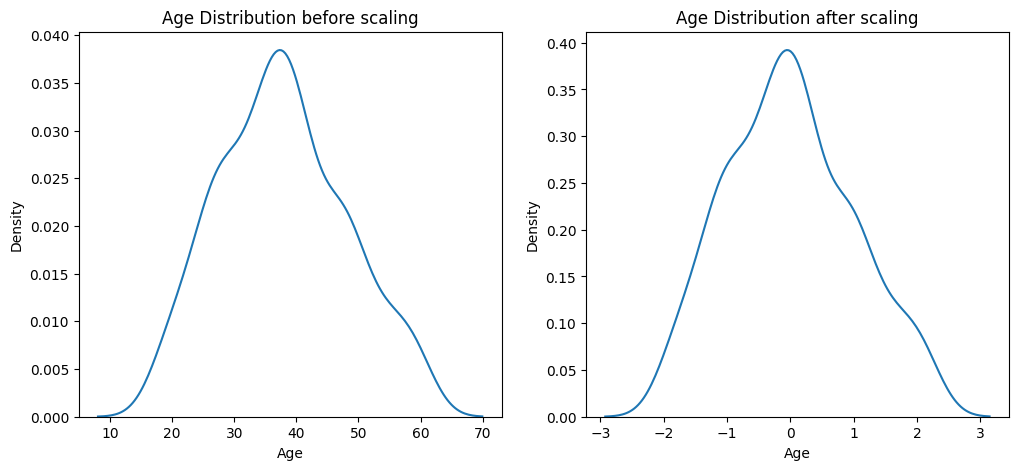

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scaling
ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()